Let’s say you work as an analyst at UpGrad and you want to find interesting patterns in ‘the typical dates and times when UpGrad students submit their assignments’.

 

The data set provided below contains information on the dates and times of students’ submissions of an assignment. It has two variables — “submission” (the unique URL of a student’s submission on the platform) and “submit_time” (the date-time of submission).


This was the Association Rule Mining assignment whose submission deadline was Jan 3, 2017 - 11:59:59 PM. The second deadline was Jan 9, 2017 - 11:59 PM. Submissions between the first and the second deadline attract a 30% penalty in marks.

 

The variable ‘submission’ has several components separated by slashes. The last component contains the submitted filename in the format ‘roll_number.xxx’ where xxx is the file extension (.zip, .R etc.)

 

You want to understand:

The typical dates when students submit assignments

The typical times (hour of the day) of submissions

 

Extract all the relevant metrics (such as the date, day, month, year, hour, and minutes) of each person’s submission and attempt the following questions.  

 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
pd.set_option('display.max_columns', None) #  sets the number of the maximum columns shown
pd.set_option('display.max_colwidth', -1) # sets the maximum width of each single field

grades_df = pd.read_csv('grades.csv')

print(grades_df.shape)

(198, 2)


In [2]:
grades_df.head()

,submission,submit_time
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44aa-88d3-6b36aaa69b02/DDA1610095.zip,01/03/17-20:28:52
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4cc4-afa3-5865733ba1d4/DDA1610288.zip,01/03/17-20:18:21
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-4342-aa95-a7018ff93150/DDA1610106.zip,01/03/17-22:37:08
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-4948-9358-fcdabfd7669c/DDA1610261.zip,01/02/17-21:43:19
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4ffa-9bf1-06bdb1a7cf8f/DDA1610028.zip,01/03/17-15:27:49


In [3]:
grades_df['submit_time'] = pd.to_datetime(grades_df['submit_time']) # convert to date time

grades_df['day'], grades_df['month'], grades_df['year'] = grades_df['submit_time'].dt.day, grades_df['submit_time'].dt.month, grades_df['submit_time'].dt.year
grades_df['hour'], grades_df['minute'] = grades_df['submit_time'].dt.hour, grades_df['submit_time'].dt.minute


In [4]:
grades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 7 columns):
submission     198 non-null object
submit_time    198 non-null datetime64[ns]
day            198 non-null int64
month          198 non-null int64
year           198 non-null int64
hour           198 non-null int64
minute         198 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 10.9+ KB


In [35]:
grades_df['submission'] = grades_df['submission'].apply(lambda x : x.strip('https://ckd.upgrad.com/UpGrad'))
#grades_df['submission'] = grades_df['submission'].apply(lambda x : if x)
grades_df['extension'] = grades_df['submission'].apply(lambda x : x.split('.')[1])
grades_df['extension'] = grades_df['extension'].apply(lambda x : x+'p' if x== 'zi' else x)
grades_df['roll_no'] = grades_df['submission'].apply(lambda x : x.split('/')[1].strip('.zi'))

grades_df['roll_no'] = grades_df['roll_no'].apply(lambda x : x.strip(".R") if x.find(".R") == -1 else x)

In [36]:
grades_df

,submission,submit_time,day,month,year,hour,minute,extension,roll_no
0,73ba5189-94fd-44aa-88d3-6b36aaa69b02/DDA1610095.zi,2017-01-03 20:28:52,3,1,2017,20,28,zip,DDA1610095
1,185242ff-7508-4cc4-afa3-5865733ba1d4/DDA1610288.zi,2017-01-03 20:18:21,3,1,2017,20,18,zip,DDA1610288
2,353d129-c100-4342-aa95-a7018ff93150/DDA1610106.zi,2017-01-03 22:37:08,3,1,2017,22,37,zip,DDA1610106
3,002fc912-faa1-4948-9358-fcdabfd7669c/DDA1610261.zi,2017-01-02 21:43:19,2,1,2017,21,43,zip,DDA1610261
4,25cbc4a4-6d49-4ffa-9bf1-06bdb1a7cf8f/DDA1610028.zi,2017-01-03 15:27:49,3,1,2017,15,27,zip,DDA1610028
5,0ab308ab-2b3a-4c74-9bac-c12567a04754/DDA1610059.zi,2017-01-04 02:43:46,4,1,2017,2,43,zip,DDA1610059
6,ba2c249c-dac8-4619-a978-7fc4d15a9a89/DDA1610087.zi,2017-01-03 23:41:25,3,1,2017,23,41,zip,DDA1610087
7,8969806-6760-4428-a861-545fb4aff136/DDA1610042.zi,2017-01-09 23:49:09,9,1,2017,23,49,zip,DDA1610042
8,5ff1d0ab-816b-48c0-a5a2-b76b1fd1d787/DDA1610060.zi,2016-12-30 14:14:17,30,12,2016,14,14,zip,DDA1610060
9,0d507851-d102-4714-866c-348b0acf053f/DDA1610195.R,2017-01-03 21:18:04,3,1,2017,21,18,R,DDA1610195.R


In [7]:
#grades_df.drop('month', axis=1) #drop month

In [43]:
# What percentage of students submitted their solutions in .zip format?

per_submission_in_zip = round(100 * (len(grades_df[grades_df['extension'] == 'zip'].index)/len(grades_df['extension'].index)))
per_submission_in_zip

95

In [72]:
# How many students submitted the assignment after the first deadline
# (including the students who submitted after the second deadline) ?

#grades_df_after_first_dl = grades_df[(grades_df['day'] > 3) & (grades_df['year'] != 2016)]
grades_df_after_first_dl = grades_df[(grades_df['submit_time'] >= '2017-01-04')]
print(grades_df_after_first_dl.shape)
print(grades_df.shape)

percentage_of_submission_after_first_dl = round(len(grades_df_after_first_dl.index)/len(grades_df.index)*100)
percentage_of_submission_after_first_dl

(44, 9)
(198, 9)


22

In [79]:
grades_df_after_first_dl.head()

,submission,submit_time,day,month,year,hour,minute,extension,roll_no
5,0ab308ab-2b3a-4c74-9bac-c12567a04754/DDA1610059.zi,2017-01-04 02:43:46,4,1,2017,2,43,zip,DDA1610059
7,8969806-6760-4428-a861-545fb4aff136/DDA1610042.zi,2017-01-09 23:49:09,9,1,2017,23,49,zip,DDA1610042
11,873211b9-5a3q-4510-91cb-awqbd210a7f/DDA1610008.zi,2017-01-09 23:41:23,9,1,2017,23,41,zip,DDA1610008
16,f0c04fba-56d2-4ac5-bcaa-f355a9324c07/DDA1610262.zi,2017-01-04 01:43:43,4,1,2017,1,43,zip,DDA1610262
21,7cbc35aa-1d5c-4d17-b669-5bb9ab5b2f3c/DDA1610234.zi,2017-01-09 23:59:21,9,1,2017,23,59,zip,DDA1610234


In [91]:
#grades_df_after_first_dl = grades_df[(grades_df['submit_time'] >= '2017-01-01')]
#grades_df_after_first_dl.groupby('submit_time').count().plot()

counts = grades_df.groupby(['day']).count().sort_values('submission',ascending=False)
print(counts)

     submission  submit_time  month  year  hour  minute  extension  roll_no
day                                                                        
3    121         121          121    121   121   121     121        121    
9    21          21           21     21    21    21      21         21     
2    14          14           14     14    14    14      14         14     
4    12          12           12     12    12    12      12         12     
1    6           6            6      6     6     6       6          6      
30   6           6            6      6     6     6       6          6      
8    3           3            3      3     3     3       3          3      
10   3           3            3      3     3     3       3          3      
7    2           2            2      2     2     2       2          2      
19   2           2            2      2     2     2       2          2      
28   2           2            2      2     2     2       2          2      
29   2      

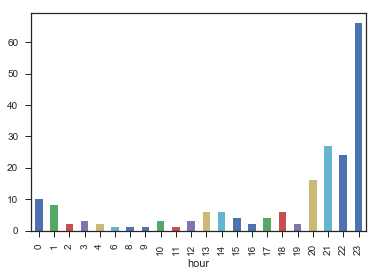

In [112]:
# In which hour of the day did most students submit the solution?
gp = grades_df.groupby('hour')['submission'].count()
gp.plot.bar()


In [99]:
totals = counts.sum(level=0)
totals


NameError: name 'hour' is not defined

In [100]:
counts = counts.unstack(level=1)
counts


hour,23,21,22,20,0,1,13,18,14,17,15,12,10,3,16,19,4,2,11,8,9,6
submission,66,27,24,16,10,8,6,6,6,4,4,3,3,3,2,2,2,2,1,1,1,1
submit_time,66,27,24,16,10,8,6,6,6,4,4,3,3,3,2,2,2,2,1,1,1,1
day,66,27,24,16,10,8,6,6,6,4,4,3,3,3,2,2,2,2,1,1,1,1
month,66,27,24,16,10,8,6,6,6,4,4,3,3,3,2,2,2,2,1,1,1,1
year,66,27,24,16,10,8,6,6,6,4,4,3,3,3,2,2,2,2,1,1,1,1
minute,66,27,24,16,10,8,6,6,6,4,4,3,3,3,2,2,2,2,1,1,1,1
extension,66,27,24,16,10,8,6,6,6,4,4,3,3,3,2,2,2,2,1,1,1,1
roll_no,66,27,24,16,10,8,6,6,6,4,4,3,3,3,2,2,2,2,1,1,1,1


In [102]:
plt.bar(counts, counts['submission'], bottom=None, color='blue', label='M')
#plt.bar(ages, counts['F'], bottom=counts['M'], color='pink', label='F')
plt.legend()
plt.xlabel('hour')
plt.ylabel('Count')

KeyError: 'submission'